# TP : Machine Learning

Import de l'image pour le traitement 

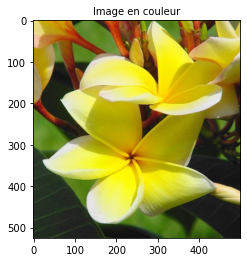

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd


image = Image.open("image_00816.jpg")

image_RGB = np.array(image)

fig1, ax1 = plt.subplots()

ax1.imshow(image_RGB)
ax1.set_title("Image en couleur",size =10)

plt.show()

Representation de l'histogramme de l'image suivant chaque canal

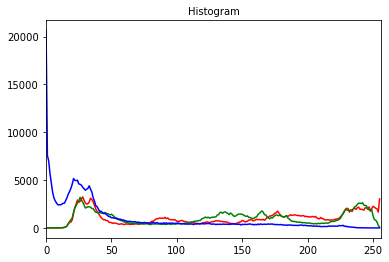

In [7]:
col = ["Red","Green","Blue"]
chanal_id = [0,1,2]
fig2, ax2 = plt.subplots()
for ch_id, c in zip(chanal_id,col) :
    histogram,binage = np.histogram(image_RGB[:,:,ch_id], bins=256,range=(0,256))
    ax2.plot(binage[0:-1],histogram, color=c)
plt.xlim([0,256])
ax2.set_title("Histogram",size =10)
plt.show()

In [49]:
import os

# Création d'un matrice nulle de taille nombre de fichiers dans SegImg// par 6.
# Cette matrice contiendra pour chaque image une ligne contenant en colonnes 
# mean_R, std_R, mean_G, std_G, mean_B, std_B

Datafeatures = np.zeros((np.shape(os.listdir("SegImg//"))[0],6)) 

index = 0

all_imgindex =[] # pour stocker le nom des images sans extension .jpg
for image_path in os.listdir("SegImg/"):
    list_R = [] # Liste des pixels rouge qui sont pas du backend
    list_G = [] # Liste des pixels vert qui sont pas du backend
    list_B = [] # Liste des pixels bleu qui sont pas du backend
    ##print(image_path)
    image_index = image_path.replace(".jpg","") #retire l'extension de l'image et stock dans image_index
    all_imgindex.append(image_index)
    image = Image.open("SegImg//"+ image_path) # accède à une image
    array_RGB = np.array(image)
    row,cool, n = array_RGB.shape
    for i in range(row):
        for j in range(cool):
            if not (array_RGB[i,j,0]==0 and array_RGB[i,j,1]==0 and array_RGB[i,j,2]==254):
                list_R.append(array_RGB[i,j,0]) #insertion en queue des pixels correpondants
                list_G.append(array_RGB[i,j,1])
                list_B.append(array_RGB[i,j,2])
                       
    mean_R  = np.mean(list_R) # Calcul de la moyenne sur les pixels rouge
    std_R   = np.std(list_R)  # Calcule de l'ecart type sur les pixels rouge
    mean_G  = np.mean(list_G) # de façon analogue on calcule les autres paramètres...
    std_G   = np.std(list_G)
    mean_B  = np.mean(list_B)
    std_B   = np.std(list_B)
    
    #Le tout est stocké dans l'ordre mean_R, std_R, mean_G, std_G, mean_B, std_B
    #avec en index la position de l'image dans SegImg [0, 139]
    Datafeatures[index,0] = mean_R
    Datafeatures[index,1] = std_R
    Datafeatures[index,2] = mean_G
    Datafeatures[index,3] = std_G
    Datafeatures[index,4] = mean_B
    Datafeatures[index,5] = std_B
    
    index +=1
    
print(Datafeatures)
    
                
                             

[[169.07943849  83.73754794 172.87225178  85.1269455  195.93853647
   70.34289695]
 [178.525668    68.95742963 173.79415882  68.69728266 151.96441822
   81.69185181]
 [190.01156558  70.14439431 180.17279516  68.6808141  146.04150178
   76.40808164]
 ...
 [150.25716518  62.0525532   99.99240613  45.10074752 113.02327153
   58.63345946]
 [162.49377198  72.21007231  73.25261329  41.53813488 114.29696666
   59.13805862]
 [168.54752273  78.94230023  27.00232691  31.94054658  80.26549187
   74.6721188 ]]


Un dataframe résumant le dataset est par la suite créé avec en index le nom de l'image correspondante sans extension .jpg

In [50]:
Datafeatures = pd.DataFrame(Datafeatures, index = all_imgindex, columns=["mean_R","std_R","mean_G","std_G","mean_B","std_B"])

In [51]:
Datafeatures.style

,mean_R,std_R,mean_G,std_G,mean_B,std_B
segmim_00781,169.079438,83.737548,172.872252,85.126946,195.938536,70.342897
segmim_00782,178.525668,68.957430,173.794159,68.697283,151.964418,81.691852
segmim_00783,190.011566,70.144394,180.172795,68.680814,146.041502,76.408082
segmim_00784,194.620835,77.577807,188.728210,76.838959,169.029540,81.944686
segmim_00785,174.587618,92.771775,169.467305,90.443068,154.033358,77.167265
segmim_00787,154.942081,74.543335,142.045216,71.302008,159.972336,85.238754
segmim_00788,156.227876,64.780294,141.119612,61.544368,116.527557,68.450649
segmim_00789,146.966356,85.364437,146.573105,84.766051,180.776258,67.075661
segmim_00790,153.101712,69.301037,150.537715,68.555621,174.236184,60.145972
segmim_00791,154.225094,82.293895,139.181317,80.983067,107.295640,91.049459


In [55]:
# Le dataset est stocké sous fichier csv
Datafeatures.to_csv("dataframe.csv")

# Apprentissage

But : il s'agit de faire une classification des images du dossier SegImg après un apprentissage. Les images sont globalement de deux types : blanches avec des teintes jaunes (classe 0 dans notre cas) et à dominance rouges (classe 1 dans notre cas).

Ces couleurs étant suffisamment distinctes, l'on peut apriori s'attendre à de très bons scores de classification après apprentissage si celui-ci est mené correctement.

In [8]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

Data = pd.read_csv("DataFeatures.csv",index_col=0)
Dataclass = pd.read_csv("FlowerClassification.csv", index_col=0)

list_features = Data.columns #liste de paramètres 

#Fournit des indices train/test pour diviser les données en ensembles train/test.
#Le choix quand bien même aléatoire est fait de façon à être réprésentatif du dataset

sss = StratifiedShuffleSplit(n_splits = 10, test_size=0.2, random_state=42)
clfReg = LogisticRegression(random_state=0) # notre classifieur

for train_index, test_index in sss.split(Data, Dataclass) : 
    X_train = Data.iloc[train_index, :] # paramètres pour le jeu d'apprentissage
    Y_train = Dataclass.iloc[train_index, :] # vérité terrain ou target correspondant
    X_test = Data.iloc[test_index, :] # paramètres pour le jeu de test
    Y_test = Dataclass.iloc[test_index, :] # vérité terrain ou target correspondant
    
    clfreG_trainned = clfReg.fit(X_train,Y_train.values.ravel()) # apprentissage
    Y_test_pred = clfreG_trainned.predict_proba(X_test) # prédiction
    
    ROC_AUC = roc_auc_score(Y_test,Y_test_pred[:,1]) # évaluation du modèle
    print(ROC_AUC)
    print(".............")
    

0.904296875
.............
0.890625
.............
0.919921875
.............
1.0
.............
0.931640625
.............
0.99609375
.............
0.974609375
.............
0.970703125
.............
0.923828125
.............
0.99609375
.............


La métrique que nous utilisons ici est le : roc_auc_score. Cette métrique indique le degré de séparabilité/distinction ou d'imbrication/croisement entre les prédictions des deux classes. Plus le score est élevé, plus la distinction est grande et plus le croisement des prédictions des deux classes est faible.

C'est bien le constat qui fut fait en amont de cette étude.
